<a href="https://colab.research.google.com/github/visionNoob/Keras_Tutorial/blob/master/Keras_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

# 1. 라이브러리 불러오기

In [1]:
# 1.라이브러리 불러오기
import tensorflow as tf # 딥러닝 라이브러리
import keras # 딥러닝 라이브러리
import numpy as np # 수학 계산 라이브러리
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리 

# 항상 버전 확인은 필수
print(tf.__version__)
print(keras.__version__)

1.15.0-rc3
2.2.5


Using TensorFlow backend.


# 2. 랜덤 시드 설정하기 (중요!)
https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development

In [0]:
# 2.랜덤 시드 고정하기
import random
seed_value = 42 # 랜덤 시드 ; 삶, 우주, 그리고 모든 것에 대한 궁극적인 질문에 대한 해답.

random.seed(seed_value)
np.random.seed(seed_value)
tf.set_random_seed(seed_value)

# 3. 데이터셋

In [0]:
img_rows = 28
img_cols = 28

def preprocess_data(data, label):
  from keras import backend as K
  if K.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
  else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)

  return (data / 255., (keras.utils.np_utils.to_categorical(label)))

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)


(60000, 28, 28, 1)


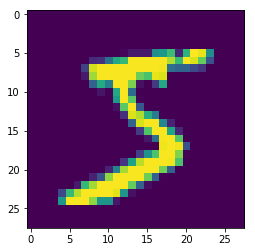

In [17]:
print(x_train.shape)
plt.imshow(x_train[0,:,:,0])
plt.show()

# 4. 모델 만들기

In [0]:
# 4.모델 만들기
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1)))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# CNN with padding='same', kernel_size=(3,3)
**input = 5x5, output = 5x5** . 

![cnn](https://cdn-media-1.freecodecamp.org/images/d0ufdQE7LHA43cdSrVefw2I9DFceYMixqoZJ)

# CNN with padding=None, kernel_size=(3,3)
**input = 7x7, output = 5x5** . 

![cnn](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed.gif)

# MaxPool
![maxPool](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

In [32]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
___________________________________________

# 5. 모델 학습과정 설정하기

In [26]:
# 5.모델 학습과정 설정하기
# sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [0]:
#es =  keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# 6. 모델 학습시키기

In [28]:
# 6.모델 학습시키기
history = model.fit(x_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=512, callbacks=[])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/100





48000/48000 [==============================] - 13s 265us/step - loss: 2.1896 - acc: 0.3725 - val_loss: 1.9040 - val_acc: 0.6963
Epoch 2/100
48000/48000 [==============================] - 5s 104us/step - loss: 1.0336 - acc: 0.7987 - val_loss: 0.4619 - val_acc: 0.8773
Epoch 3/100
48000/48000 [==============================] - 5s 104us/step - loss: 0.4232 - acc: 0.8800 - val_loss: 0.3464 - val_acc: 0.8992
Epoch 4/100
48000/48000 [==============================] - 5s 104us/step - loss: 0.3501 - acc: 0.8969 - val_loss: 0.3088 - val_acc: 0.9105
Epoch 5/100
48000/48000 [==============================] - 5s 105us/step - loss: 0.3186 - acc: 0.9069 - val_loss: 0.2851 - val_acc: 0.9177
Epoch 6/100
48000/48000 [==============================] - 5s 105us/step - loss: 0.2946 - acc: 0.9131 - val_loss: 0.2661 - val_acc: 0.9232
Epoch 7/100
4

# 7.결과 출력

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


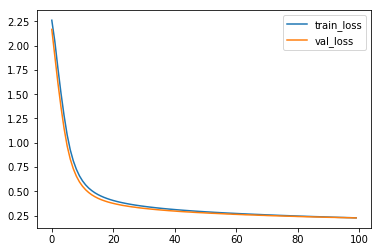

In [0]:
# Loss 출력

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('train_loss', 'val_loss'))
plt.show()

#7.결과 출력

In [0]:
result = model.evaluate(x_test, y_test)
print(result)

10000/10000 [==============================] - 1s 61us/step
[0.22774560170173644, 0.9333]


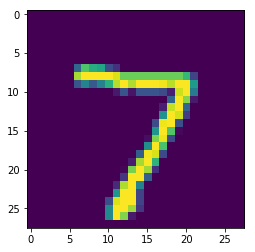

In [0]:
plt.imshow(x_test[0])

In [0]:
y_hat = model.predict(x_test[0:1])

In [0]:
print(y_hat)

[[4.1282288e-05 2.0600034e-07 1.6996519e-04 3.7784837e-03 1.8664602e-08
  1.8958865e-05 5.2022288e-12 9.9593383e-01 2.2947295e-05 3.4264849e-05]]


In [0]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
np.argmax(y_hat)

7

In [0]:
np.max(y_hat)

0.99593383